# Project 2: Efficient Frontier


Group Members:

1. Saanavi Goyal
2. Vanessa Campos
3. Jannat Nabonee

*Primary Objective:*  For this project, you will select a basket of seven (7) assets, calculate their individual
risk/return value, combine these into the efficient frontier, and then plot the results.

**Requirements**

Step 1: Choose seven (7) assets (preferably something with significant historical data)

Step 2: Retrieve daily open or close data on your assets for the previous 2 years

Step 3: Calculate the mean, variance, and correlation matrix for all assets

Step 4: Calculate efficient frontier and optimal weights for your portfolio (Don’t forget the output!)

Step 5: Use MatPlotLib or Seaborn libraries to graph the results (matrix and frontier)

Step 6: Output the calculated optimal weighting (identify portfolio weightings for optimum Sharpe Ratio)
along with the efficient frontier and correlation matrix charts. Output to a saved file.

**Step 1:** 7 NYSE Traded Assets:
  1. Johnson & Johnson
  2. Coca-cola
  3. The Walt Disney Company
  4. AT&T
  5. Boeing
  6. CVS Health Corporation
  7. United Parcel Service

In [ ]:
pip install yfinance

In [ ]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from datetime import datetime
import seaborn as sns

**#Step 2: Retrieve daily close data on assets for the previous 2 years**

In [ ]:
# Define the list of tickers and the start date
tickers = ['JNJ', 'KO', 'DIS', 'T', 'BA', 'CVS', 'UPS']
start_date = (datetime.now() - pd.DateOffset(years=2)).strftime('%Y-%m-%d')
end_date = datetime.now().strftime('%Y-%m-%d')

# Download the data for the tickers
df = yf.download(tickers, start=start_date, end=end_date)

# Extract Close data
close_data = df['Close']

close_data.head(5)


[*********************100%***********************]  7 of 7 completed


Ticker,BA,CVS,DIS,JNJ,KO,T,UPS
Date,,,,,,,
2022-11-01 00:00:00+00:00,143.380005,94.620003,106.000000,173.089996,59.639999,18.350000,167.399994
2022-11-02 00:00:00+00:00,147.410004,96.800003,101.820000,170.429993,58.810001,18.430000,164.580002
2022-11-03 00:00:00+00:00,156.750000,97.800003,99.250000,170.720001,58.779999,18.170000,164.009995
2022-11-04 00:00:00+00:00,160.009995,99.559998,99.580002,171.479996,59.259998,18.320000,165.690002
2022-11-07 00:00:00+00:00,164.910004,101.180000,100.430000,172.979996,59.490002,18.360001,169.130005


**Step 3: Calculate the mean, variance, and correlation matrix for all assets**

In [ ]:
# Calculate the mean
mean_returns = close_data.mean()

# Calculate the variance
variance = close_data.var()

# Calculate the correlation matrix
correlation_matrix = close_data.corr()

print("Mean returns:\n", mean_returns)
print("\nVariance:\n", variance)
print("\nCorrelation matrix:\n", correlation_matrix)

Mean returns:
 Ticker
BA     196.297614
CVS     72.438827
DIS     95.865069
JNJ    159.948688
KO      61.858708
T       17.613042
UPS    159.041312
dtype: float64

Variance:
 Ticker
BA     578.845674
CVS    134.484815
DIS     86.878130
JNJ     69.499332
KO      15.527554
T        4.164520
UPS    390.849520
dtype: float64

Correlation matrix:
 Ticker        BA       CVS       DIS       JNJ        KO         T       UPS
Ticker                                                                      
BA      1.000000  0.259583 -0.173498  0.068183 -0.527224 -0.557961  0.537549
CVS     0.259583  1.000000  0.114423  0.603114 -0.351090 -0.000962  0.685190
DIS    -0.173498  0.114423  1.000000 -0.244477  0.023504  0.280495 -0.026210
JNJ     0.068183  0.603114 -0.244477  1.000000  0.241200  0.172003  0.461112
KO     -0.527224 -0.351090  0.023504  0.241200  1.000000  0.729256 -0.375390
T      -0.557961 -0.000962  0.280495  0.172003  0.729256  1.000000 -0.234418
UPS     0.537549  0.685190 -0.026210  0

**Step 4: Calculate efficient frontier and optimal weights for portfolio**

In [16]:
# Portfolio settings
num_assets = len(tickers)
num_portfolios = 100000
results = np.zeros((3 + num_assets, num_portfolios))
risk_free_rate = 0.02

for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)

    portfolio_return = np.dot(weights, mean_returns)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(close_data.pct_change().cov(), weights)))

    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev

    results[0, i] = portfolio_return
    results[1, i] = portfolio_std_dev
    results[2, i] = sharpe_ratio
    for j in range(len(weights)):
        results[j + 3, i] = weights[j]

In [17]:
#using max sharpe to locate the porfolio
max_sharpe_idx = results[2].argmax()
optimal_weights = results[3:, max_sharpe_idx]
optimal_return = results[0, max_sharpe_idx]
optimal_std_dev = results[1, max_sharpe_idx]
optimal_sharpe = results[2, max_sharpe_idx]

In [18]:
#printing results
print("\nOptimal Portfolio Weights (Max Sharpe Ratio):")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.2%}")

print("\nOptimal Portfolio Return:", optimal_return)
print("Optimal Portfolio Risk (Std Dev):", optimal_std_dev)
print("Optimal Portfolio Sharpe Ratio:", optimal_sharpe)


Optimal Portfolio Weights (Max Sharpe Ratio):
JNJ: 16.68%
KO: 1.84%
DIS: 9.30%
T: 52.21%
BA: 4.10%
CVS: 5.11%
UPS: 10.77%

Optimal Portfolio Return: 147.04968525588237
Optimal Portfolio Risk (Std Dev): 0.008269801169927683
Optimal Portfolio Sharpe Ratio: 17779.10765140779


**Step 5: Graph the Results**

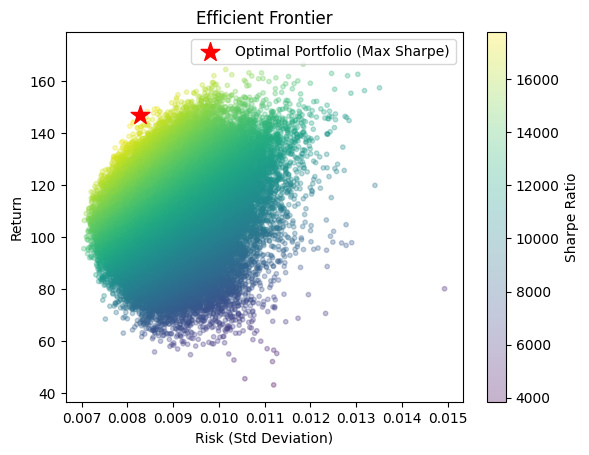

In [21]:
#plot the efficient frontier using matplot
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o', s=10, alpha=0.3)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(optimal_std_dev, optimal_return, c='red', marker='*', s=200, label='Optimal Portfolio (Max Sharpe)')
plt.title('Efficient Frontier')
plt.xlabel('Risk (Std Deviation)')
plt.ylabel('Return')
plt.legend()
plt.savefig("Efficient_Frontier.png")
plt.show()

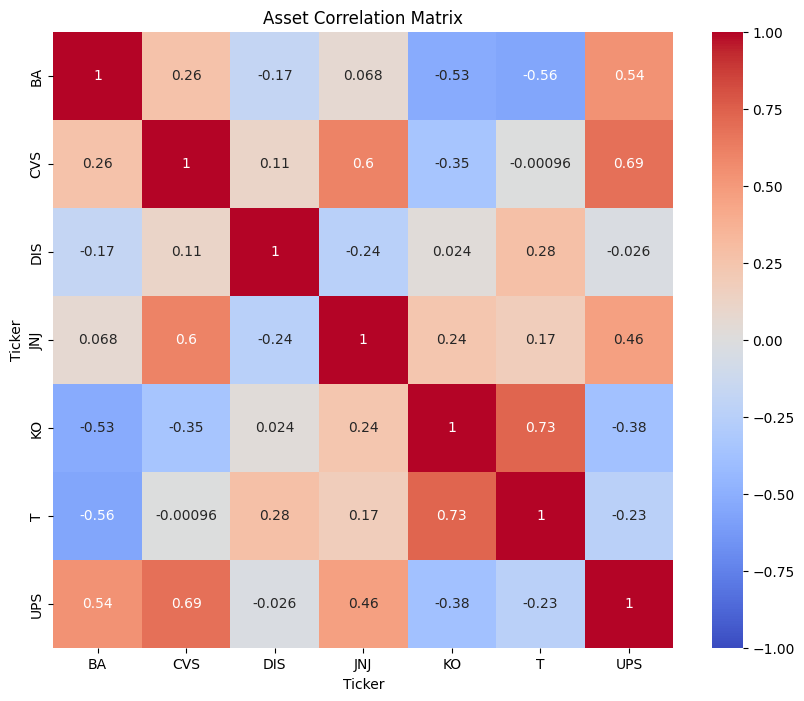

In [20]:
#correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Asset Correlation Matrix')
plt.savefig("correlation_matrix.png")
plt.show()

**Step 6: Output the calculated optimal weighting (identify portfolio weightings for optimum Sharpe Ratio)
along with the efficient frontier and correlation matrix charts. Output to a saved file.**

In [23]:
#Create dataframe for optimal weights
optimal_weights_df = pd.DataFrame({
    'Ticker': tickers,
    'Optimal Weights (Sharpe Ratio)': optimal_weights
})

print("\nOptimal Portfolio Weights (Max Sharpe Ratio):")
print(optimal_weights_df)

# Save the DataFrame to a CSV file
optimal_weights_df.to_csv('optimal_portfolio_weights.csv', index=False)


Optimal Portfolio Weights (Max Sharpe Ratio):
  Ticker  Optimal Weights (Sharpe Ratio)
0    JNJ                        0.166767
1     KO                        0.018352
2    DIS                        0.092980
3      T                        0.522079
4     BA                        0.041009
5    CVS                        0.051119
6    UPS                        0.107694


In [25]:
#Efficient frontier and correlation matrix charts saved as PNG files in step 5.